In [1]:
import h5py
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import time

from networkx.algorithms import community
from uoineuro.coupling_utils import *

%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/coupling')

In [3]:
# consolidate AC results
ac_results_path = os.path.join(base_path, 'ecog/ecog_coupling.h5')
ac_results = h5py.File(ac_results_path, 'r')
ac_lasso_ccs = np.median(ac_results['lasso/coupling_coefs'], axis=0)
ac_uoi_lasso_ccs = np.median(ac_results['uoi_lasso_bic/coupling_coefs'], axis=0)

In [4]:
# consolidate VC results
vc_results_paths = [os.path.join(base_path, 'pvc11/pvc11_monkey1_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey2_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey3_coupling.h5')]
n_vc_fits = len(vc_results_paths)
vc_results = [h5py.File(vc_results_path, 'r')
              for vc_results_path in vc_results_paths]
# extract coupling coefficients
vc_lasso_ccs = [np.median(vc_result['lasso/coupling_coefs'], axis=0)
                for vc_result in vc_results]
vc_uoi_lasso_ccs = [np.median(vc_result['uoi_lasso_bic/coupling_coefs'], axis=0)
              for vc_result in vc_results]
vc_glmnet_ccs = [np.median(vc_result['glmnet_poisson/coupling_coefs'], axis=0)
                for vc_result in vc_results]
vc_uoi_poisson_ccs = [np.median(vc_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for vc_result in vc_results]

In [5]:
# consolidate MC results
mc_results_paths = [os.path.join(base_path, 'nhp/nhp_indy_20160407_02_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_01_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_02_coupling.h5')]
n_mc_fits = len(mc_results_paths)
mc_results = [h5py.File(mc_results_path, 'r')
              for mc_results_path in mc_results_paths]
# extract coupling coefficients
mc_lasso_ccs = [np.median(mc_result['lasso/coupling_coefs'], axis=0)
                for mc_result in mc_results]
mc_uoi_lasso_ccs = [np.median(mc_result['uoi_lasso_bic/coupling_coefs'], axis=0)
              for mc_result in mc_results]
mc_glmnet_ccs = [np.median(mc_result['glmnet_poisson/coupling_coefs'], axis=0)
                for mc_result in mc_results]
mc_uoi_poisson_ccs = [np.median(mc_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for mc_result in mc_results]

In [6]:
lasso_ccs = [ac_lasso_ccs] + vc_lasso_ccs + mc_lasso_ccs
uoi_lasso_ccs = [ac_uoi_lasso_ccs] + vc_uoi_lasso_ccs + mc_uoi_lasso_ccs
glmnet_ccs = vc_glmnet_ccs + mc_glmnet_ccs
uoi_poisson_ccs = vc_uoi_poisson_ccs + mc_uoi_poisson_ccs

In [7]:
lasso_sgraphs = [create_symmetrized_graph(lasso_ccs[idx])[0]
                for idx in range(len(lasso_ccs))]
uoi_lasso_sgraphs = [create_symmetrized_graph(uoi_lasso_ccs[idx])[0]
                    for idx in range(len(uoi_lasso_ccs))]
glmnet_sgraphs = [create_symmetrized_graph(glmnet_ccs[idx])[0]
                 for idx in range(len(glmnet_ccs))]
uoi_poisson_sgraphs = [create_symmetrized_graph(uoi_poisson_ccs[idx])[0]
                      for idx in range(len(uoi_poisson_ccs))]

In [8]:
lasso_dgraphs = [create_directed_graph(lasso_ccs[idx], weighted=True)
                for idx in range(len(lasso_ccs))]
uoi_lasso_dgraphs = [create_directed_graph(uoi_lasso_ccs[idx], weighted=True)
                    for idx in range(len(uoi_lasso_ccs))]
glmnet_dgraphs = [create_directed_graph(glmnet_ccs[idx], weighted=True)
                 for idx in range(len(glmnet_ccs))]
uoi_poisson_dgraphs = [create_directed_graph(uoi_poisson_ccs[idx], weighted=True)
                      for idx in range(len(uoi_poisson_ccs))]

In [9]:
d_graphs = {
    'ac_baseline': lasso_dgraphs[0],
    'ac_uoi': uoi_lasso_dgraphs[0],
    'vc_monkey1_baseline': glmnet_dgraphs[0],
    'vc_monkey2_baseline': glmnet_dgraphs[1],
    'vc_monkey3_baseline': glmnet_dgraphs[2],
    'mc_monkey1_baseline': glmnet_dgraphs[3],
    'mc_monkey2_baseline': glmnet_dgraphs[4],
    'mc_monkey3_baseline': glmnet_dgraphs[5],
    'vc_monkey1_uoi': uoi_poisson_dgraphs[0],
    'vc_monkey2_uoi': uoi_poisson_dgraphs[1],
    'vc_monkey3_uoi': uoi_poisson_dgraphs[2],
    'mc_monkey1_uoi': uoi_poisson_dgraphs[3],
    'mc_monkey2_uoi': uoi_poisson_dgraphs[4],
    'mc_monkey3_uoi': uoi_poisson_dgraphs[5],
}

In [10]:
s_graphs = {
    'ac_baseline': lasso_sgraphs[0],
    'ac_uoi': uoi_lasso_sgraphs[0],
    'vc_monkey1_baseline': glmnet_sgraphs[0],
    'vc_monkey2_baseline': glmnet_sgraphs[1],
    'vc_monkey3_baseline': glmnet_sgraphs[2],
    'mc_monkey1_baseline': glmnet_sgraphs[3],
    'mc_monkey2_baseline': glmnet_sgraphs[4],
    'mc_monkey3_baseline': glmnet_sgraphs[5],
    'vc_monkey1_uoi': uoi_poisson_sgraphs[0],
    'vc_monkey2_uoi': uoi_poisson_sgraphs[1],
    'vc_monkey3_uoi': uoi_poisson_sgraphs[2],
    'mc_monkey1_uoi': uoi_poisson_sgraphs[3],
    'mc_monkey2_uoi': uoi_poisson_sgraphs[4],
    'mc_monkey3_uoi': uoi_poisson_sgraphs[5],
}

## In-degree / out-degree

In [11]:
in_degrees = {
    key: np.array(list(dict(val.in_degree()).values()))
    for key, val in d_graphs.items()
}

out_degrees = {
    key: np.array(list(dict(val.out_degree()).values()))
    for key, val in d_graphs.items()
}

for degrees in [in_degrees, out_degrees]:
    degrees['vc_baseline'] = np.concatenate(
        (degrees['vc_monkey1_baseline'],
         degrees['vc_monkey2_baseline'],
         degrees['vc_monkey3_baseline'])
    )
    degrees['vc_uoi'] = np.concatenate(
        (degrees['vc_monkey1_uoi'],
         degrees['vc_monkey2_uoi'],
         degrees['vc_monkey3_uoi'])
    )
    degrees['mc_baseline'] = np.concatenate(
        (degrees['mc_monkey1_baseline'],
         degrees['mc_monkey2_baseline'],
         degrees['mc_monkey3_baseline'])
    )
    degrees['mc_uoi'] = np.concatenate(
        (degrees['mc_monkey1_uoi'],
         degrees['mc_monkey2_uoi'],
         degrees['mc_monkey3_uoi'])
    )

## Modularity

In [12]:
modularities = {
    key: compute_modularity(val)
    for key, val in d_graphs.items()
}

## Small-worldness

In [13]:
small_world_omega = {}
small_world_sigma = {}

In [19]:
t = time.time()
small_world_omega['mc_monkey1_uoi'] = compute_small_worldness(
    G=s_graphs['mc_monkey1_uoi'],
    metric='omega',
    niter=50,
    nrand=2,
    seed=2332
)
print(time.time() - t)
t = time.time()
G = s_graphs['mc_monkey1_baseline']
G = max(nx.connected_component_subgraphs(G), key=len)
small_world_omega['mc_monkey1_baseline'] = nx.algorithms.smallworld.omega(G, niter=50, nrand=2, seed=2332)


{}

In [ ]:
for key, graph in s_graphs.items():
    G = graph.copy()
    G = max(nx.connected_component_subgraphs(G), key=len)
    t = time.time()
    small_world_omega[key] = nx.algorithms.smallworld.omega(G, nrand=5, seed=2332)
    print(key, ' omega: ', time.time() - t)
    
    small_world_sigma[key] = nx.algorithms.smallworld.sigma(G, nrand=5, seed=2332)
    print(key, ' sigma: ', time.time() - t)

## Figure Plot

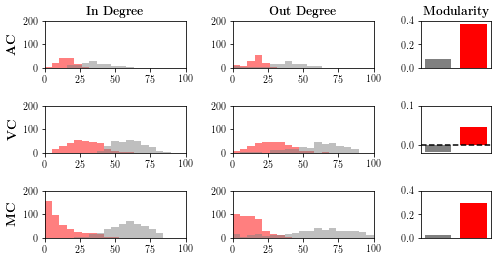

In [86]:
fig, axes = plt.subplots(3, 3, figsize=(8, 4),
                         gridspec_kw={'width_ratios': [1, 1, 0.5]})

bins = np.linspace(0, 100, 20)

ac_in = axes[0, 0]
ac_out = axes[0, 1]

ac_in.hist(
    [in_degrees['ac_baseline'], in_degrees['ac_uoi']],
    color=['gray', 'red'],
    alpha=0.5,
    bins=bins,
    histtype='stepfilled')
ac_out.hist(
    [out_degrees['ac_baseline'], out_degrees['ac_uoi']],
    alpha=0.5,
    color=['gray', 'red'],
    bins=bins,
    histtype='stepfilled')

vc_in = axes[1, 0]
vc_out = axes[1, 1]

vc_in.hist(
    [in_degrees['vc_baseline'], in_degrees['vc_uoi']],
    color=['gray', 'red'],
    alpha=0.5,
    bins=bins,
    histtype='stepfilled')
vc_out.hist(
    [out_degrees['vc_baseline'], out_degrees['vc_uoi']],
    alpha=0.5,
    color=['gray', 'red'],
    bins=bins,
    histtype='stepfilled')

mc_in = axes[2, 0]
mc_out = axes[2, 1]

mc_in.hist(
    [in_degrees['mc_baseline'], in_degrees['mc_uoi']],
    color=['gray', 'red'],
    alpha=0.5,
    bins=bins,
    histtype='stepfilled')
mc_out.hist(
    [out_degrees['mc_baseline'], out_degrees['mc_uoi']],
    alpha=0.5,
    color=['gray', 'red'],
    bins=bins,
    histtype='stepfilled')

for ax in axes[:, :2].ravel():
    ax.tick_params(labelsize=10)
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 200])
    
# modularities
axes[0, 2].bar(x=[0, 1],
               height=[modularities['ac_baseline'], modularities['ac_uoi']],
               color=['gray', 'red'],
               width=0.75)

axes[1, 2].bar(x=[0, 1],
               height=[np.mean([modularities['vc_monkey1_baseline'],
                                modularities['vc_monkey2_baseline'],
                                modularities['vc_monkey3_baseline']]),
                       np.mean([modularities['vc_monkey1_uoi'],
                                modularities['vc_monkey2_uoi'],
                                modularities['vc_monkey3_uoi']])],
               color=['gray', 'red'],
               width=0.75)
axes[2, 2].bar(x=[0, 1],
               height=[np.mean([modularities['mc_monkey1_baseline'],
                                modularities['mc_monkey2_baseline'],
                                modularities['mc_monkey3_baseline']]),
                       np.mean([modularities['mc_monkey1_uoi'],
                                modularities['mc_monkey2_uoi'],
                                modularities['mc_monkey3_uoi']])],
               color=['gray', 'red'],
               width=0.75)

axes[1, 2].axhline(0, color='k', linestyle='--')

for ax in axes[:, 2]:
    ax.set_xlim([-0.5, 1.5])
    ax.tick_params(labelsize=10)
    ax.set_xticks([])

axes[0, 2].set_yticks([0, 0.2, 0.4])
axes[1, 2].set_yticks([0, 0.1])
axes[2, 2].set_yticks([0, 0.2, 0.4])

axes[0, 0].set_title(r'\textbf{In Degree}', fontsize=12)
axes[0, 1].set_title(r'\textbf{Out Degree}', fontsize=12)
axes[0, 2].set_title(r'\textbf{Modularity}', fontsize=12)
axes[0, 0].set_ylabel(r'\textbf{AC}', fontsize=13)
axes[1, 0].set_ylabel(r'\textbf{VC}', fontsize=13)
axes[2, 0].set_ylabel(r'\textbf{MC}', fontsize=13)

plt.subplots_adjust(hspace=0.80, wspace=0.4)
plt.savefig('graph_analysis.pdf', bbox_inches='tight')

## Controllability

In [338]:
A = nx.adjacency_matrix(create_symmetrized_graph(coupling_coefs=vc_lasso_ccs[1])[0]).todense()
B = np.zeros((A.shape[0], A.shape[0]))
# B = np.identity(A.shape[0])
B[0, 0] = 1

W = np.zeros(A.shape)
T = 500
Apow2 = np.zeros(A.shape)

for ii in range(T):
    Apow2 += np.linalg.matrix_power(A, 2*ii)
    
for ii in range(T):
    Apow = np.linalg.matrix_power(A, ii)
    W += Apow @ B @ Apow

In [328]:
G1 = create_symmetrized_graph(coupling_coefs=mc_lasso_ccs[1])[0]
G2 = create_symmetrized_graph(coupling_coefs=mc_uoi_lasso_ccs[1])[0]

A1 = nx.adjacency_matrix(G1).todense()
A2 = nx.adjacency_matrix(G2).todense()

u1, v1 = np.linalg.eigh(A1)
u2, v2 = np.linalg.eigh(A2)

mc1 = np.sum((1 - u1**2)[np.newaxis] * np.array(v1)**2, axis=1)
mc2 = np.sum(((1 - u2**2)[np.newaxis] * np.array(v2).T**2), axis=1)

dd1 = np.array([d for n,d in G1.degree()])
dd2 = np.array([d for n,d in G2.degree()])

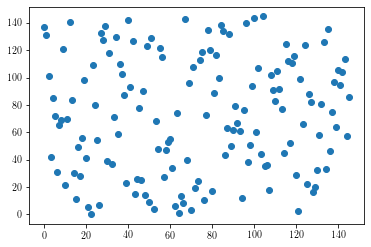

In [332]:
plt.scatter(np.argsort(dd2), np.argsort(mc2))

In [277]:
lam, v = np.linalg.eigh(A)
np.sum((1 - lam**2) * v**2, axis=1)

matrix([[-3.86898166]])

In [59]:
controllability = np.zeros((7, 2, 4, 25))

for idx, (baseline, uoi) in enumerate(zip(lasso_ccs, uoi_lasso_ccs)):
    control_baseline = compute_controllability_curves(
        create_symmetrized_graph(coupling_coefs=baseline)[0]
    )
    control_uoi = compute_controllability_curves(
        create_symmetrized_graph(coupling_coefs=uoi)[0],
    )
    controllability[idx, 0] = control_baseline.T
    controllability[idx, 1] = control_uoi.T

/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
